In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
resultpath = "" ## YOUR RESULT PATH HERE

## Multivariate Gaussians

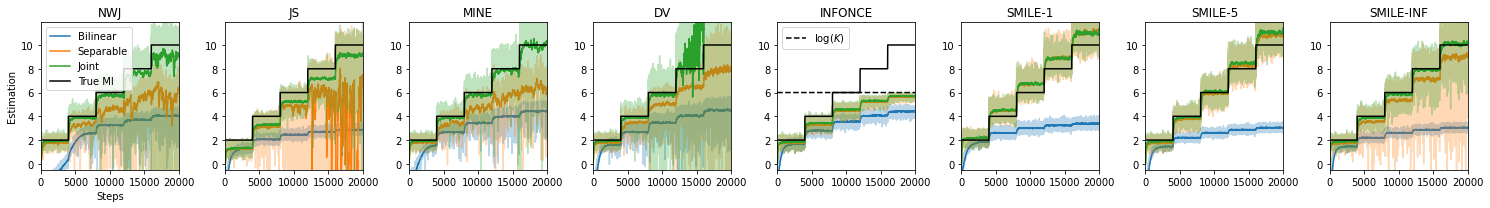

In [8]:
opts = ['bilinear', 'separable', 'concat']
legends = {'bilinear': 'Bilinear', 'separable': 'Separable', 'concat': 'Joint'}
estimators = ['nwj', 'js', 'mine', 'dv', 'infonce', 'smile-1', 'smile-5', 'smile-inf']

mi_true = [2]*4000 + [4]*4000 + [6]*4000 + [8]*4000 + [10]*4000

fig, axs = plt.subplots(1, 8, figsize=(2.6*8, 3*1))
axs = np.ravel(axs)

for opt in opts:
    for i, e in enumerate(estimators):
        plt.sca(axs[i])
        plt.title(e.upper())
        fname = os.path.join(
            resultpath, 'gaussian-bit/MI=2-4-6-8-10/cubic=False/ds=10.dr=10.None.0.0.norm=False..10/noise=None.0.000/scaling=None',
            'critic=%s.mlp.256.2.32.None' %opt, 
            'optimizer=adam.lr=0.0005.clip=0/batch=64', e, 'mi.npy')
            
        if os.path.exists(fname):
            mis = np.load(fname)
            mis = [mi * np.log2(np.exp(1)) for mi in mis]
            mis_smooth = pd.Series(mis).ewm(span=200).mean()

            p1 = plt.plot(mis, alpha=0.3)[0]
            plt.plot(mis_smooth, c=p1.get_color(), label=legends[opt]) #opt.capitalize())
        if (e == "infonce") & (opt == 'concat'):
            plt.plot([np.log2(64)]*20000, linestyle='--', c='k', label=r'log($K$)')
                    
        plt.ylim(-0.5, 11.9)
        plt.xlim(0, 20000)
        
        if opt == opts[-1]:
            plt.plot(mi_true, color='k', label='True MI')

        if i == 0:
            plt.xlabel("Steps")
            plt.ylabel("Estimation")
            plt.legend()
        if i == 4:
            f = lambda m: plt.plot([], [], marker="None", color="k", ls="dashed")[0]
            handles = [f("None")]
            labels = [r'log($K$)']
            plt.legend(handles, labels, loc="upper left")
    
plt.savefig("figures/gaussian.pdf", bbox_inches="tight")
plt.gcf().tight_layout()
plt.show()

## Images

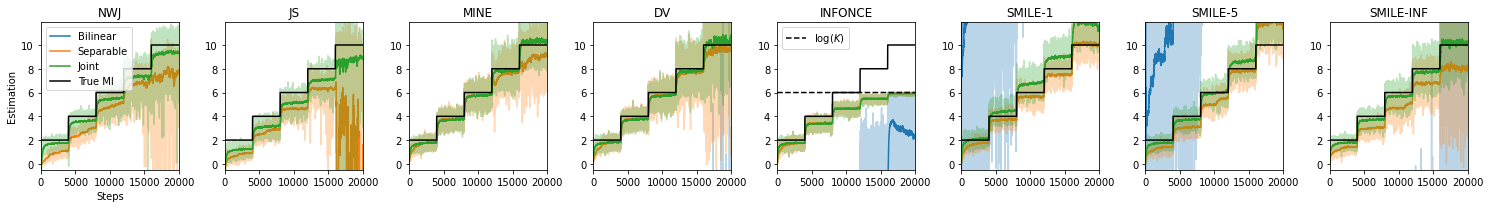

In [9]:
opts = ['bilinear', 'separable', 'concat']
estimators = ['nwj', 'js', 'mine', 'dv', 'infonce', 'smile-1', 'smile-5', 'smile-inf']

mi_true = [2]*4000 + [4]*4000 + [6]*4000 + [8]*4000 + [10]*4000

fig, axs = plt.subplots(1, 8, figsize=(2.6*8, 3*1))
axs = np.ravel(axs)

for opt in opts:
    for i, e in enumerate(estimators):
        plt.sca(axs[i])
        plt.title(e.upper())
        fname = os.path.join(
            resultpath, 'image-schedule/fixpatch/mnist.0.1/imgsize=64', 
            f'critic={opt}.mlp.256.2.32/normalization=None/batchsize=64/estimator={e}/optimizer=adam.learning_rate=0.0005/mi.npy')
            
        if os.path.exists(fname):
            mis = np.load(fname)
            mis_smooth = pd.Series(mis).ewm(span=200).mean()

            p1 = plt.plot(mis, alpha=0.3)[0]
            if opt == "concat":
                plt.plot(mis_smooth, c=p1.get_color(), label="Joint")
            else:
                plt.plot(mis_smooth, c=p1.get_color(), label=opt.capitalize())
        else:
            print(fname)
        if (e == "infonce") & (opt == 'concat'):
            plt.plot([np.log2(64)]*20000, linestyle='--', c='k', label=r'log($K$)')
                    
        plt.ylim(-0.5, 11.9)
        plt.xlim(0, 20000)
        
        if opt == opts[-1]:
            plt.plot(mi_true, color='k', label='True MI')

        if i == 0:
            plt.xlabel("Steps")
            plt.ylabel("Estimation")
            plt.legend()
        if i == 4:
            f = lambda m: plt.plot([], [], marker="None", color="k", ls="dashed")[0]
            handles = [f("None")]
            labels = [r'log($K$)']
            plt.legend(handles, labels, loc="upper left")

plt.savefig("figures/images.pdf", bbox_inches="tight")
plt.gcf().tight_layout()
plt.show()

## Sentence Embeddings

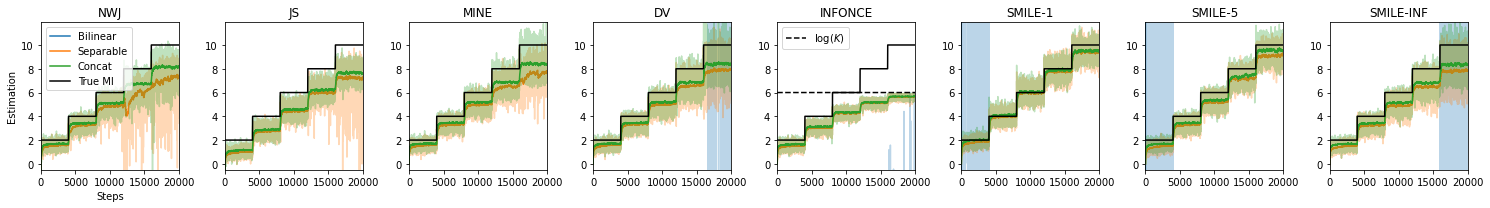

In [10]:
opts = ['bilinear', 'separable', 'concat']
estimators = ['nwj', 'js', 'mine', 'dv', 'infonce', 'smile-1', 'smile-5', 'smile-inf']

mi_true = [2]*4000 + [4]*4000 + [6]*4000 + [8]*4000 + [10]*4000

fig, axs = plt.subplots(1, 8, figsize=(2.6*8, 3*1))
axs = np.ravel(axs)

for opt in opts:
    for i, e in enumerate(estimators):
        plt.sca(axs[i])
        plt.title(e.upper())
        fname = os.path.join(
            resultpath, 'text-schedule/data=imdb.encoder=roberta-imdb-finetuned/n_text=10.dr=7680', 
            f'critic={opt}.mlp.256.2.32/normalization=None/batchsize=64/estimator={e}/optimizer=adam.learning_rate=0.0005/mi.npy')
            
        if os.path.exists(fname):
            mis = np.load(fname)
            mis_smooth = pd.Series(mis).ewm(span=200).mean()

            p1 = plt.plot(mis, alpha=0.3)[0]
            plt.plot(mis_smooth, c=p1.get_color(), label=opt.capitalize())
        else:
            print(fname)
        if (e == "infonce") & (opt == 'concat'):
            plt.plot([np.log2(64)]*20000, linestyle='--', c='k', label=r'log($K$)')
                    
        plt.ylim(-0.5, 11.9)
        plt.xlim(0, 20000)
        
        if opt == opts[-1]:
            plt.plot(mi_true, color='k', label='True MI')
        
        if i == 0:
            plt.xlabel("Steps")
            plt.ylabel("Estimation")
            plt.legend()
        if i == 4:
            f = lambda m: plt.plot([], [], marker="None", color="k", ls="dashed")[0]
            handles = [f("None")]
            labels = [r'log($K$)']
            plt.legend(handles, labels, loc="upper left")

plt.savefig("figures/text.pdf", bbox_inches="tight")
plt.gcf().tight_layout()
plt.show()